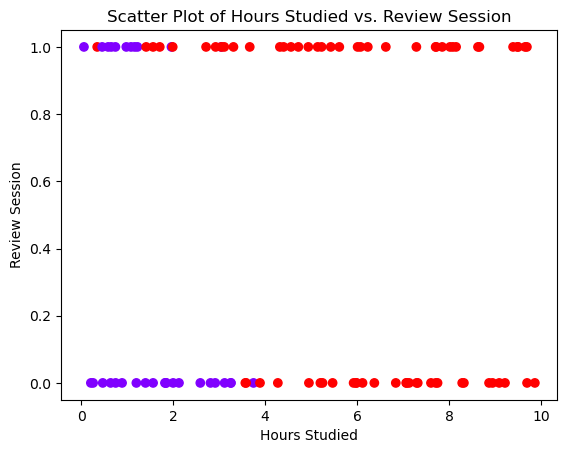

Coefficients: [[1.36499215 1.87733756]]
Intercept: [-4.61182462]
Accuracy: 0.93


C:\Users\Srina\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Srina\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Srina\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Srina\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed

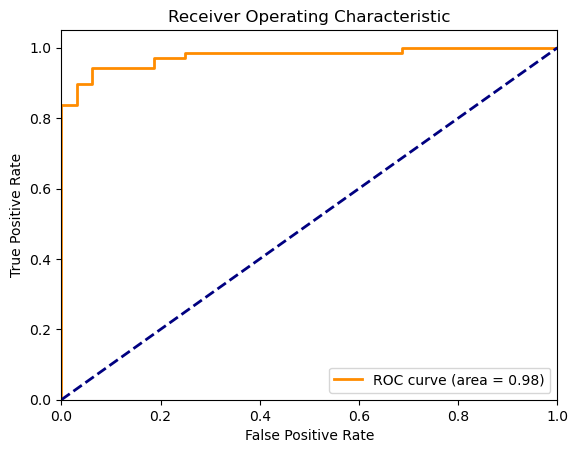

In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc

# Load the dataset
data = pd.read_csv("student_data.csv")

X = data[['Hours_Studied', 'Review_Session']]
y = data['Results']

plt.scatter(X['Hours_Studied'], X['Review_Session'], c=y, cmap='rainbow')
plt.xlabel('Hours Studied')
plt.ylabel('Review Session')
plt.title('Scatter Plot of Hours Studied vs. Review Session')
plt.show()

# Initialize and fit the logistic regression model
model = LogisticRegression()
model.fit(X, y)
WW
# Model coefficients
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Make predictions on the same dataset
predictions = model.predict(X)

# Calculate accuracy
accuracy = accuracy_score(y, predictions)
print("Accuracy:", accuracy)

# Calculate AUC and ROC
probabilities = model.predict_proba(X)[:, 1]
fpr, tpr, thresholds = roc_curve(y, probabilities)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [4]:
# Import necessary libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Load the dataset
data = pd.read_csv("student_data.csv")

# Assuming 'Results' is the column you want to predict
X = data[['Hours_Studied', 'Review_Session']]
y = data['Results']

# Initialize and fit the logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Make predictions on the same dataset
probabilities = model.predict_proba(X)[:, 1]

# Calculate AUC
auc = roc_auc_score(y, probabilities)
print("AUC:", auc)


AUC: 0.9761029411764706


C:\Users\Srina\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Srina\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Srina\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Srina\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed

In [17]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv("student_data.csv")

# Assuming 'Results' is the column you want to predict
X = data[['Hours_Studied', 'Review_Session']]
y = data['Results']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: Fit SVM model with linear kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
predictions_linear = svm_linear.predict(X_test)
accuracy_linear = accuracy_score(y_test, predictions_linear)
print("Accuracy with Linear Kernel:", accuracy_linear)

# Step 2: Fit SVM model with RBF kernel and perform grid search for best gamma parameter
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}
svm_rbf = SVC(kernel='rbf')
grid_search = GridSearchCV(svm_rbf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and fit the model
best_params = grid_search.best_params_
best_svm_rbf = SVC(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'])
best_svm_rbf.fit(X_train, y_train)

# Evaluate the model
predictions_rbf = best_svm_rbf.predict(X_test)
accuracy_rbf = accuracy_score(y_test, predictions_rbf)
print("Best Parameters (RBF Kernel):", best_params)
print("Accuracy with RBF Kernel:", accuracy_rbf)


Accuracy with Linear Kernel: 0.85
Best Parameters (RBF Kernel): {'C': 1, 'gamma': 1}
Accuracy with RBF Kernel: 0.85


C:\Users\Srina\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Srina\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Srina\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Srina\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed